In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime
table = "disclosure_events"
# 날짜 범위 설정
start_date = datetime(2022, 7, 1)
end_date = datetime(2023, 12, 28)

query = f"""SELECT * FROM {table}
WHERE stock_code is not NULL
  AND market IN ('KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL')
  AND disclosed_at >= %(start_date)s
  AND disclosed_at <= %(end_date)s
ORDER BY id ASC"""

df = pd.read_sql(query, engine, params={"start_date": start_date, "end_date": end_date})
print(f"데이터베이스에서 조회된 공시 이벤트 수: {len(df)}")
df


DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


데이터베이스에서 조회된 공시 이벤트 수: 25939


,id,stock_code,market,company_name,report_name,disclosed_at,summary_kr,raw,created_at,ret_1m,...,ret_high_3m,ret_high_10m,ret_high_15m,ret_high_30m,ret_high_60m,peak_timedelta_3m,peak_timedelta_10m,peak_timedelta_15m,peak_timedelta_30m,peak_timedelta_60m
0,32519,KR7114190002,KOSDAQ,강원에너지,타법인주식및출자증권취득결정(자율공시),2022-07-01 01:03:17+00:00,"강원에너지(시가총액 1,842억 원)는 2022년 7월 1일 강원이솔루션의 주식을 ...","2022.07.01 10:03:16\n기업명: 강원에너지(시가총액: 1,842억)\...",2025-08-09 19:13:15.234304,-0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32520,KR7082920000,KOSDAQ,비츠로셀,단일판매ㆍ공급계약체결,2022-07-01 01:24:45+00:00,비츠로셀이 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,"2022.07.01 10:24:44\n기업명: 비츠로셀(시가총액: 2,477억)\n...",2025-08-09 19:13:15.234304,-0.85,...,NaN,NaN,0.85,1.27,1.27,NaN,NaN,15.0,17.0,17.0
2,32521,KR7042370007,KOSDAQ,비츠로테크,단일판매ㆍ공급계약체결(자회사의 주요경영사항),2022-07-01 01:27:02+00:00,비츠로테크는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했...,"2022.07.01 10:27:02\n기업명: 비츠로테크(시가총액: 1,821억)\...",2025-08-09 19:13:15.234304,0.00,...,NaN,NaN,NaN,0.58,1.29,NaN,NaN,NaN,30.0,50.0
3,32522,KR7014820005,KOSPI,동원시스템즈,신규시설투자등(자율공시),2022-07-01 01:43:15+00:00,동원시스템즈는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신...,"2022.07.01 10:43:14\n기업명: 동원시스템즈(시가총액: 1조 5,61...",2025-08-09 19:13:15.234304,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32524,KR7226950004,KOSDAQ,올릭스,투자판단관련주요경영사항(노인성 황반변성 환자에서 OLX10212의 안전성 및 내약성...,2022-07-01 02:30:09+00:00,올릭스는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서 ...,"2022.07.01 11:30:08\n기업명: 올릭스(시가총액: 2,946억)\n보...",2025-08-09 19:13:15.234304,-1.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25934,68109,KR7383930005,KOSDAQ,디티앤씨알오,[투자주의]투자경고종목 지정예고,2023-12-27 09:50:43+00:00,"2023년 12월 27일, 디티앤씨알오가 투자경고종목 지정예고 대상에 올랐으며, 이...",보고서명 : [투자주의]투자경고종목 지정예고\n회사명 : 디티앤씨알오(시가총액 : ...,2025-07-08 17:09:03.053194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25935,68111,KR7059100008,KOSDAQ,아이컴포넌트,(예고)단기과열종목(3거래일 단일가매매) 지정예고,2023-12-27 09:50:47+00:00,아이컴포넌트는 2023년 12월 27일 단기 과열 종목(3거래일 단일가매매) 지정예...,보고서명 : (예고)단기과열종목(3거래일 단일가매매) 지정예고\n회사명 : 아이컴포...,2025-07-08 17:09:03.053194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25936,68112,KR7298060005,KOSDAQ,에스씨엠생명과학,(예고)단기과열종목(3거래일 단일가매매) 지정예고,2023-12-27 09:50:49+00:00,"에스씨엠생명과학은 2023년 12월 27일, 단기 과열 종목으로 지정 예고되었으며,...",보고서명 : (예고)단기과열종목(3거래일 단일가매매) 지정예고\n회사명 : 에스씨엠...,2025-07-08 17:09:03.053194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25937,68113,KR7206650004,KOSDAQ,유바이오로직스,투자판단관련주요경영사항(임상시험계획승인신청)(대상포진 예방 백신 EuHZV(유에이치...,2023-12-27 22:48:21+00:00,유바이오로직스는 대상포진 예방 백신 EuHZV의 국내 제1상 임상시험계획 승인 신청...,"2023.12.28 07:48:20\n기업명: 유바이오로직스(시가총액: 4,156억...",2025-07-08 17:09:03.053194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


시장별 공시 분포:
market
KOSDAQ           12969
KOSPI            11955
KOSDAQ GLOBAL     1015
Name: count, dtype: int64

총 공시 건수: 25939

시장별 비율:
KOSDAQ: 12969건 (50.0%)
KOSPI: 11955건 (46.1%)
KOSDAQ GLOBAL: 1015건 (3.9%)


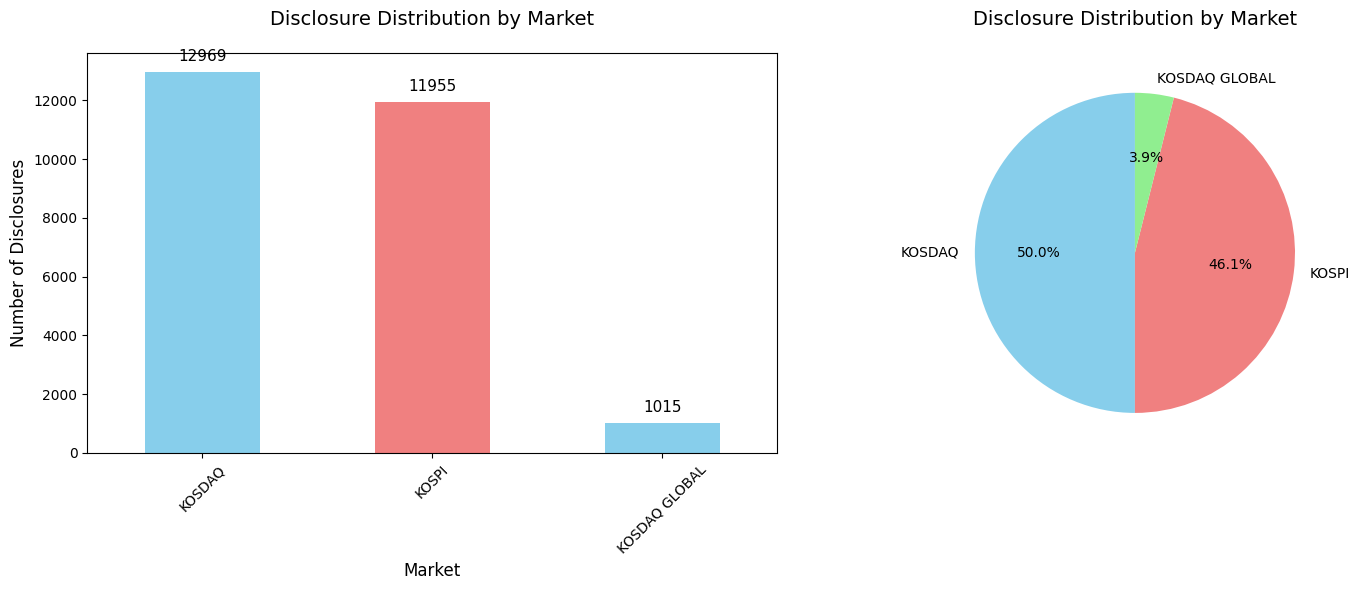

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# market 종류와 각각의 비율 분석
market_counts = df['market'].value_counts()
print("시장별 공시 분포:")
print(market_counts)
print(f"\n총 공시 건수: {len(df)}")
print("\n시장별 비율:")
for market, count in market_counts.items():
    ratio = count / len(df) * 100
    print(f"{market}: {count}건 ({ratio:.1f}%)")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
market_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)
ax1.set_xlabel('Market', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(market_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
market_ratios = market_counts / len(df) * 100
ax2.pie(market_ratios.values, labels=market_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


공시 발표 시간대별 분포:
market_session
After Hours      16318
Trading Hours     9621
Name: count, dtype: int64

장중 비율: 37.1%
장외 비율: 62.9%


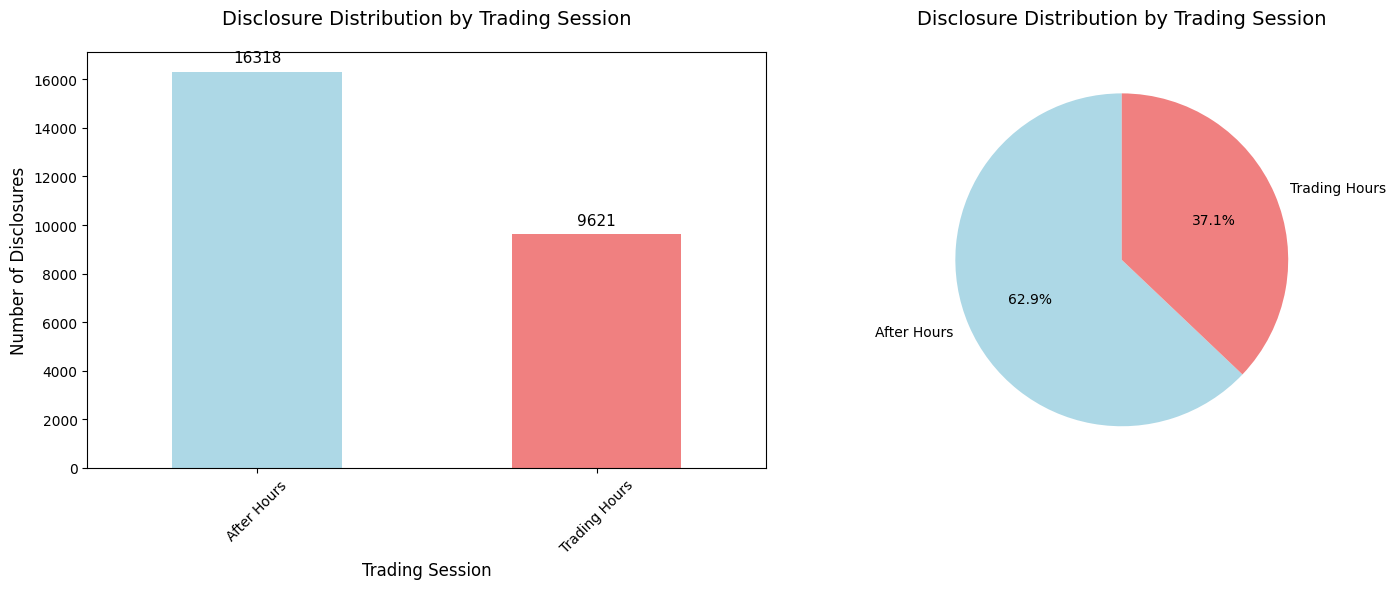

In [4]:
# disclosed_at을 datetime으로 변환 (이미 timezone-aware 상태)
df['disclosed_at'] = pd.to_datetime(df['disclosed_at'])

# 이미 timezone-aware이므로 tz_convert만 사용하여 KST로 변환
df['disclosed_at_kst'] = df['disclosed_at'].dt.tz_convert('Asia/Seoul')

# KST 시간에 따라 데이터프레임 정렬
df = df.sort_values('disclosed_at_kst')

# 시간만 추출 (KST 기준)
df['time_only'] = df['disclosed_at_kst'].dt.time

# 장중 시간 정의 (9:00 ~ 15:30)
import datetime
market_open = datetime.time(9, 0)
market_close = datetime.time(15, 30)

# 장중/장외 분류
df['market_session'] = df['time_only'].apply(
    lambda x: 'Trading Hours' if market_open <= x <= market_close else 'After Hours'
)

# 결과 집계
session_counts = df['market_session'].value_counts()
print("공시 발표 시간대별 분포:")
print(session_counts)
print(f"\n장중 비율: {session_counts.get('Trading Hours', 0) / len(df) * 100:.1f}%")
print(f"장외 비율: {session_counts.get('After Hours', 0) / len(df) * 100:.1f}%")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
session_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Trading Session', fontsize=14, pad=20)
ax1.set_xlabel('Trading Session', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
session_ratios = session_counts / len(df) * 100
ax2.pie(session_ratios.values, labels=session_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Disclosure Distribution by Trading Session', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
from datetime import datetime


query = f"""
SELECT ar.event_id,
    ar.event_ts,
    ar.market,
    de.company_name,
    de.report_name,
    l.summary_kr,
    l.masked,
    ar.abn_ret_10m,
    ar.abn_ret_20m,
    ar.abn_ret_30m,
    ar.abn_ret_40m,
    ar.abn_ret_50m,
    ar.abn_ret_60m,
    l.label
FROM abnormal_return ar
JOIN label l ON ar.event_id = l.id
JOIN disclosure_events de ON ar.event_id = de.id
ORDER BY l.id ASC"""

target_df = pd.read_sql(query, engine)
target_df

,event_id,event_ts,market,company_name,report_name,summary_kr,masked,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label
0,32519,2022-07-01 01:03:17+00:00,KOSDAQ,강원에너지,타법인주식및출자증권취득결정(자율공시),"강원에너지(시가총액 1,842억 원)는 2022년 7월 1일 강원이솔루션의 주식을 ...","회사 A(시가총액 1,842억 원)는 2022년 7월 1일 회사 B의 주식을 20억...",-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,0.0
1,32520,2022-07-01 01:24:45+00:00,KOSDAQ,비츠로셀,단일판매ㆍ공급계약체결,비츠로셀이 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,회사 A가 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,0.53,2.43,1.19,1.57,1.38,1.72,0.0
2,32521,2022-07-01 01:27:02+00:00,KOSDAQ,비츠로테크,단일판매ㆍ공급계약체결(자회사의 주요경영사항),비츠로테크는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했...,회사 A는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했으...,0.29,0.24,1.25,1.39,2.02,1.63,0.0
3,32522,2022-07-01 01:43:15+00:00,KOSPI,동원시스템즈,신규시설투자등(자율공시),동원시스템즈는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신...,회사 A는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신규시...,0.08,0.36,0.31,0.12,-0.18,0.23,0.0
4,32524,2022-07-01 02:30:09+00:00,KOSDAQ,올릭스,투자판단관련주요경영사항(노인성 황반변성 환자에서 OLX10212의 안전성 및 내약성...,올릭스는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서 ...,회사 A는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서...,-0.40,-1.02,-1.80,-1.24,-1.82,-1.60,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8339,68128,2023-12-28 05:53:08+00:00,KOSPI,까뮤이앤씨,단일판매ㆍ공급계약체결,까뮤이앤씨는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지...,회사 A는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지역...,0.24,0.24,NaN,NaN,NaN,NaN,0.0
8340,68129,2023-12-28 05:55:03+00:00,KOSPI,에코프로머티,조회공시요구(현저한시황변동)에대한답변(미확정),"에코프로머티리얼즈는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된...","회사 A는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된 내용은 ...",-2.10,-3.25,NaN,NaN,NaN,NaN,1.0
8341,68130,2023-12-28 05:56:27+00:00,KOSDAQ,에코마케팅,[기재정정]연결재무제표기준영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으...","회사 A은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으로...",-0.28,-0.54,NaN,NaN,NaN,NaN,0.0
8342,68131,2023-12-28 05:56:32+00:00,KOSDAQ,에코마케팅,[기재정정]영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며,...","회사 A는 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며, ...",-0.28,-0.54,NaN,NaN,NaN,NaN,0.0


In [23]:
target_df.to_csv("target_df_gpt_abn_return.csv", index=False)

In [24]:
print("\n=== 기본 데이터 분석 ===")

# 컬럼 정보
print(f"컬럼 수: {len(target_df.columns)}")
print(f"컬럼명: {list(target_df.columns)}")

# 데이터 타입
print("\n데이터 타입:")
print(target_df.dtypes)

# 결측값 확인
print("\n결측값 현황:")
print(target_df.isnull().sum())


=== 기본 데이터 분석 ===
컬럼 수: 14
컬럼명: ['event_id', 'event_ts', 'market', 'company_name', 'report_name', 'summary_kr', 'masked', 'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m', 'label']

데이터 타입:
event_id                      int64
event_ts        datetime64[ns, UTC]
market                       object
company_name                 object
report_name                  object
summary_kr                   object
masked                       object
abn_ret_10m                 float64
abn_ret_20m                 float64
abn_ret_30m                 float64
abn_ret_40m                 float64
abn_ret_50m                 float64
abn_ret_60m                 float64
label                       float64
dtype: object

결측값 현황:
event_id           0
event_ts           0
market             0
company_name       0
report_name        0
summary_kr         0
masked             0
abn_ret_10m        0
abn_ret_20m      450
abn_ret_30m      902
abn_ret_40m     1302
abn_ret_50m

In [25]:
ret_columns =["abn_ret_10m", "abn_ret_20m", "abn_ret_30m", "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"]


=== 키워드 기반 공시 유형별 분석 ===
총 40개의 공시 카테고리가 있습니다.

공시 카테고리별 분포:
disclosure_category
실적공시        3225
지분공시        1190
IR활동        1067
공급계약체결      1023
매출변동         335
자사주취득        266
자산양수도        137
투자판단         116
유무상증자        109
조회공시          99
자율공시          86
전환가액조정        83
수시공시          82
특허권           81
자사주처분         64
신규투자          63
임상시험계획신청      47
소송            46
배당            30
임상시험계획승인      25
자사주소각         24
장래계획          22
전환사채권발행       21
회사합병          18
자회사경영         12
기술료수령         11
품목허가신청         9
임상시험결과         7
품목허가승인         7
영업정지           7
회사분할           6
전환청구권행사        6
국책과제           5
감자             4
기술이전           3
임상시험계획철회       3
영업양수도          2
해외진출           1
주식교환이전         1
기타             1
Name: count, dtype: int64

수익률 데이터가 있는 공시 건수: 8344
전체 대비 비율: 100.0%

수익률 데이터가 있는 공시 카테고리별 건수:
disclosure_category
실적공시        3225
지분공시        1190
IR활동        1067
공급계약체결      1023
매출변동         335
자사주취득        266
자산양수도        137
투자판단 

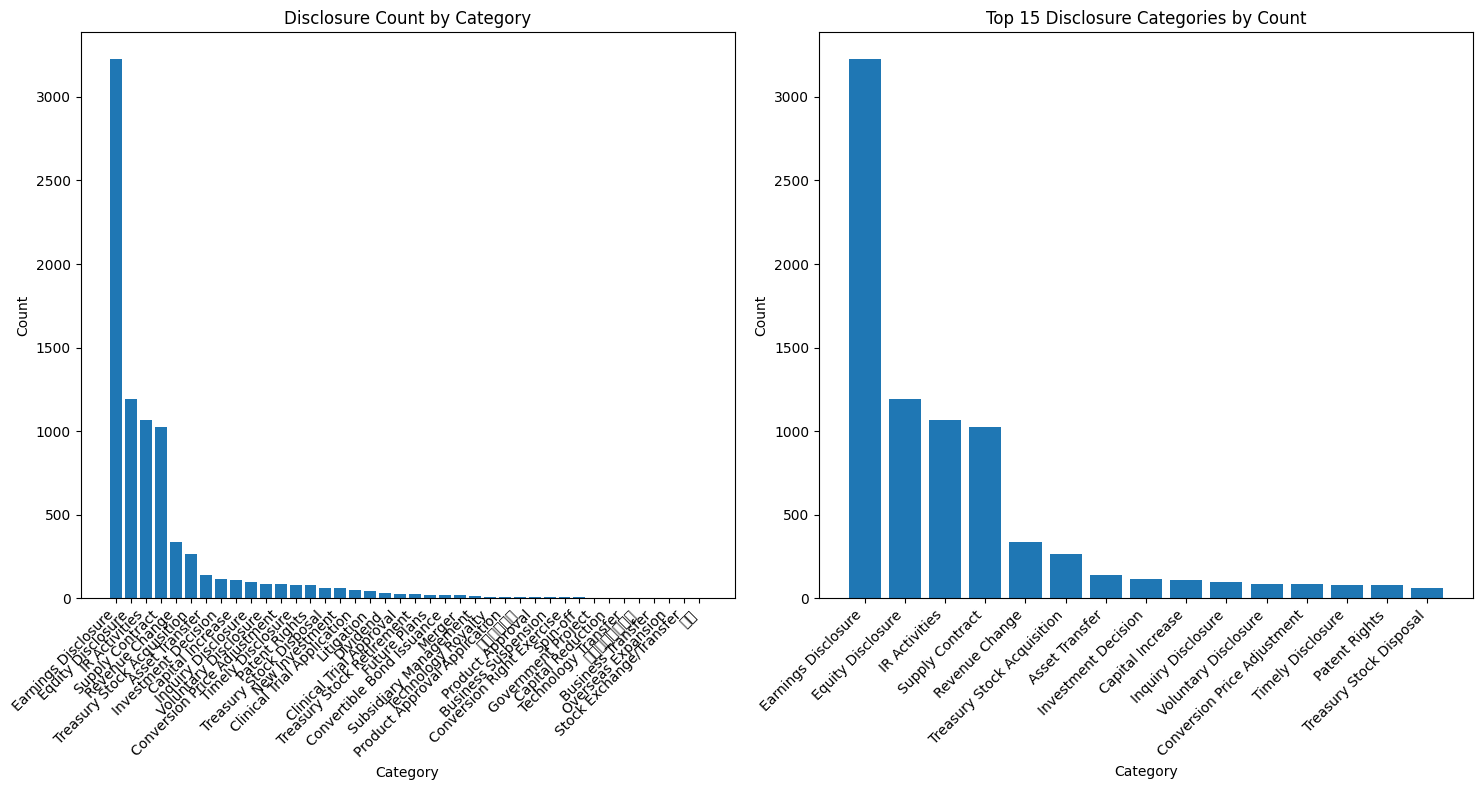

총 40개 카테고리, 총 8344건의 공시

상위 15개 카테고리:
disclosure_category
실적공시      3225
지분공시      1190
IR활동      1067
공급계약체결    1023
매출변동       335
자사주취득      266
자산양수도      137
투자판단       116
유무상증자      109
조회공시        99
자율공시        86
전환가액조정      83
수시공시        82
특허권         81
자사주처분       64
Name: count, dtype: int64


In [26]:
import sys
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sys.path.append("../analysis")

from eda_helper import analyze_disclosure_types_by_keywords, calculate_return_statistics_by_category

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 한글-영어 카테고리 매핑
category_mapping = {
    "자산양수도": "Asset Transfer",
    "부도발생": "Default",
    "영업정지": "Business Suspension",
    "회생절차": "Rehabilitation",
    "해산": "Dissolution",
    "유무상증자": "Capital Increase",
    "감자": "Capital Reduction",
    "채권은행관리": "Creditor Bank Management",
    "소송": "Litigation",
    "해외상장": "Overseas Listing",
    "신주인수권부사채권": "Bond with Warrant",
    "교환사채권": "Exchangeable Bond",
    "상각형조건부자본증권": "Contingent Capital Securities",
    "자사주취득": "Treasury Stock Acquisition",
    "자사주처분": "Treasury Stock Disposal",
    "자사주소각": "Treasury Stock Retirement",
    "전환사채권발행": "Convertible Bond Issuance",
    "영업양수도": "Business Transfer",
    "회사합병": "Merger",
    "회사분할": "Spin-off",
    "주식교환이전": "Stock Exchange/Transfer",
    "공급계약체결": "Supply Contract",
    "IR활동": "IR Activities",
    "실적공시": "Earnings Disclosure",
    "특허권": "Patent Rights",
    "기술료수령": "Technology Royalty",
    "기술이전": "Technology Transfer",
    "품목허가승인": "Product Approval",
    "품목허가신청": "Product Approval Application",
    "임상시험계획신청": "Clinical Trial Application",
    "임상시험계획승인": "Clinical Trial Approval",
    "전환가액조정": "Conversion Price Adjustment",
    "지분공시": "Equity Disclosure",
    "신규투자": "New Investment",
    "조회공시": "Inquiry Disclosure",
    "수시공시": "Timely Disclosure",
    "장래계획": "Future Plans",
    "매출변동": "Revenue Change",
    "전환청구권행사": "Conversion Right Exercise",
    "자문용역": "Advisory Services",
    "국책과제": "Government Project",
    "해외진출": "Overseas Expansion",
    "자회사경영": "Subsidiary Management",
    "자율공시": "Voluntary Disclosure",
    "공정공시": "Fair Disclosure",
    "안내공시": "Information Disclosure",
    "배당": "Dividend",
    "투자판단": "Investment Decision"
}

df_with_returns, category_counts = analyze_disclosure_types_by_keywords(target_df, ret_columns = ret_columns)

# 카테고리별 건수 시각화
plt.figure(figsize=(15, 8))
category_counts_sorted = category_counts.sort_values(ascending=False)

# 한글 카테고리를 영어로 매핑
category_counts_sorted_en = category_counts_sorted.copy()
category_counts_sorted_en.index = [category_mapping.get(cat, cat) for cat in category_counts_sorted_en.index]

plt.subplot(1, 2, 1)
plt.bar(range(len(category_counts_sorted_en)), category_counts_sorted_en.values)
plt.title('Disclosure Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts_sorted_en)), category_counts_sorted_en.index, rotation=45, ha='right')

# 상위 15 카테고리만 별도 표시
plt.subplot(1, 2, 2)
top_10 = category_counts_sorted_en.head(15)
plt.bar(range(len(top_10)), top_10.values)
plt.title('Top 15 Disclosure Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(top_10)), top_10.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"총 {len(category_counts)}개 카테고리, 총 {category_counts.sum()}건의 공시")
print("\n상위 15개 카테고리:")
print(category_counts_sorted.head(15))

In [27]:
df_with_returns

,event_id,event_ts,market,company_name,report_name,summary_kr,masked,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label,disclosure_category
0,32519,2022-07-01 01:03:17+00:00,KOSDAQ,강원에너지,타법인주식및출자증권취득결정(자율공시),"강원에너지(시가총액 1,842억 원)는 2022년 7월 1일 강원이솔루션의 주식을 ...","회사 A(시가총액 1,842억 원)는 2022년 7월 1일 회사 B의 주식을 20억...",-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,0.0,자산양수도
1,32520,2022-07-01 01:24:45+00:00,KOSDAQ,비츠로셀,단일판매ㆍ공급계약체결,비츠로셀이 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,회사 A가 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,0.53,2.43,1.19,1.57,1.38,1.72,0.0,공급계약체결
2,32521,2022-07-01 01:27:02+00:00,KOSDAQ,비츠로테크,단일판매ㆍ공급계약체결(자회사의 주요경영사항),비츠로테크는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했...,회사 A는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했으...,0.29,0.24,1.25,1.39,2.02,1.63,0.0,공급계약체결
3,32522,2022-07-01 01:43:15+00:00,KOSPI,동원시스템즈,신규시설투자등(자율공시),동원시스템즈는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신...,회사 A는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신규시...,0.08,0.36,0.31,0.12,-0.18,0.23,0.0,신규투자
4,32524,2022-07-01 02:30:09+00:00,KOSDAQ,올릭스,투자판단관련주요경영사항(노인성 황반변성 환자에서 OLX10212의 안전성 및 내약성...,올릭스는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서 ...,회사 A는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서...,-0.40,-1.02,-1.80,-1.24,-1.82,-1.60,2.0,임상시험계획신청
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8339,68128,2023-12-28 05:53:08+00:00,KOSPI,까뮤이앤씨,단일판매ㆍ공급계약체결,까뮤이앤씨는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지...,회사 A는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지역...,0.24,0.24,NaN,NaN,NaN,NaN,0.0,공급계약체결
8340,68129,2023-12-28 05:55:03+00:00,KOSPI,에코프로머티,조회공시요구(현저한시황변동)에대한답변(미확정),"에코프로머티리얼즈는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된...","회사 A는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된 내용은 ...",-2.10,-3.25,NaN,NaN,NaN,NaN,1.0,조회공시
8341,68130,2023-12-28 05:56:27+00:00,KOSDAQ,에코마케팅,[기재정정]연결재무제표기준영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으...","회사 A은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으로...",-0.28,-0.54,NaN,NaN,NaN,NaN,0.0,실적공시
8342,68131,2023-12-28 05:56:32+00:00,KOSDAQ,에코마케팅,[기재정정]영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며,...","회사 A는 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며, ...",-0.28,-0.54,NaN,NaN,NaN,NaN,0.0,실적공시


In [41]:
df_with_returns[df_with_returns["disclosure_category"] == "배당"]

,event_id,event_ts,market,company_name,report_name,summary_kr,masked,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label,disclosure_category
7081,63890,2023-10-10 02:59:17+00:00,KOSPI,경농,현금ㆍ현물배당결정,"경농은 2023년 9월 30일 기준 현금 분기배당을 실시하며, 보통주에 200원(배...","회사 A은 2023년 9월 30일 기준 현금 분기배당을 실시하며, 보통주에 200원...",0.24,-0.01,-0.07,0.56,0.05,-0.23,2.0,배당
7092,63938,2023-10-11 02:09:19+00:00,KOSPI,동남합성,현금ㆍ현물배당결정,동남합성은 2023년 3분기 배당으로 보통주에 대해 500원의 현금배당을 결정했으며...,회사 A은 2023년 3분기 배당으로 보통주에 대해 500원의 현금배당을 결정했으며...,-0.09,-0.12,-0.23,-0.24,-0.26,-0.26,0.0,배당
7141,64143,2023-10-19 04:39:30+00:00,KOSDAQ,필옵틱스,현금ㆍ현물배당결정(분기배당),필옵틱스는 2023년 9월 30일 기준으로 보통주에 대해 188원의 분기 현금배당을...,회사 A는 2023년 9월 30일 기준으로 보통주에 대해 188원의 분기 현금배당을...,0.30,-0.23,-0.31,0.41,0.01,-0.33,0.0,배당
7205,64335,2023-10-25 02:32:32+00:00,KOSPI,신한지주,현금ㆍ현물배당결정,신한지주는 2023년 3분기 분기배당으로 보통주에 525원의 현금 배당금을 결정했으...,회사 A는 2023년 3분기 분기배당으로 보통주에 525원의 현금 배당금을 결정했으...,-0.05,0.02,-0.14,0.12,-0.11,-0.13,0.0,배당
7253,64428,2023-10-26 06:09:33+00:00,KOSPI,HD현대,현금ㆍ현물배당결정,HD현대는 2023년 3분기 기준으로 보통주에 대해 900원의 분기 현금배당을 결정...,회사 A는 2023년 3분기 기준으로 보통주에 대해 900원의 분기 현금배당을 결정...,-0.12,NaN,NaN,NaN,NaN,NaN,0.0,배당
7286,64511,2023-10-27 05:28:58+00:00,KOSPI,하나금융지주,현금ㆍ현물배당결정,하나금융지주는 2023년 3분기 배당금으로 보통주에 600원(배당률 1.4%)을 현...,회사 A는 2023년 3분기 배당금으로 보통주에 600원(배당률 1.4%)을 현금으...,0.18,0.17,0.02,0.13,0.27,NaN,0.0,배당
8115,67440,2023-12-12 01:53:36+00:00,KOSDAQ,엠게임,현금ㆍ현물배당결정,"엠게임은 2023년 결산배당으로 보통주에 150원의 현금 배당을 결정했으며, 배당 ...","회사 A은 2023년 결산배당으로 보통주에 150원의 현금 배당을 결정했으며, 배당...",1.80,0.86,1.56,1.99,2.54,2.46,0.0,배당
8126,67473,2023-12-13 04:57:01+00:00,KOSPI,셀트리온,현금ㆍ현물배당결정,"셀트리온은 2023년 결산배당으로 보통주에 대해 500원의 현금 배당을 결정했으며,...","회사 A는 2023년 결산배당으로 보통주에 대해 500원의 현금 배당을 결정했으며,...",0.14,-0.01,-0.02,-0.02,0.11,0.18,1.0,배당
8152,67525,2023-12-14 04:51:29+00:00,KOSDAQ,레드캡투어,현금ㆍ현물배당결정,"레드캡투어는 2023년 결산배당으로 보통주에 대해 700원의 현금배당을 결정했으며,...","회사 A는 2023년 결산배당으로 보통주에 대해 700원의 현금배당을 결정했으며, ...",0.00,0.44,0.35,0.21,0.11,0.05,1.0,배당
8167,67596,2023-12-15 00:52:33+00:00,KOSPI,엠씨넥스,현금ㆍ현물배당결정,"엠씨넥스는 2023년 결산배당으로 보통주에 600원의 현금배당을 결정하였으며, 배당...","회사 A는 2023년 결산배당으로 보통주에 600원의 현금배당을 결정하였으며, 배당...",0.15,-0.04,0.06,0.19,-0.01,0.04,0.0,배당


In [31]:
import os

# analysis/type 폴더 생성 (없으면 만들기)
type_folder = "../analysis/type_gpt_abn_return"
os.makedirs(type_folder, exist_ok=True)

# 각 카테고리별로 CSV 파일 저장
print("\n=== 카테고리별 CSV 파일 저장 ===")

for category in df_with_returns['disclosure_category'].unique():
    # 해당 카테고리의 데이터 필터링
    category_data = df_with_returns[df_with_returns['disclosure_category'] == category]
    
    # company_name, report_name 컬럼만 선택
    category_data_selected = category_data[['event_ts', 'company_name', 'report_name']]
    
    # 파일명 생성 (특수문자 제거)
    safe_filename = category.replace("/", "_").replace("\\", "_").replace(":", "_").replace("*", "_").replace("?", "_").replace("\"", "_").replace("<", "_").replace(">", "_").replace("|", "_")
    filename = f"{safe_filename}.csv"
    filepath = os.path.join(type_folder, filename)
    
    # CSV 파일로 저장
    category_data_selected.to_csv(filepath, index=False, encoding='utf-8-sig')
    
    print(f"{category}: {len(category_data)}건 -> {filename}")

print(f"\n총 {len(df_with_returns['disclosure_category'].unique())}개 카테고리의 CSV 파일이 {type_folder} 폴더에 저장되었습니다.")



=== 카테고리별 CSV 파일 저장 ===
자산양수도: 137건 -> 자산양수도.csv
공급계약체결: 1023건 -> 공급계약체결.csv
신규투자: 63건 -> 신규투자.csv
임상시험계획신청: 47건 -> 임상시험계획신청.csv
자사주처분: 64건 -> 자사주처분.csv
자사주취득: 266건 -> 자사주취득.csv
유무상증자: 109건 -> 유무상증자.csv
IR활동: 1067건 -> IR활동.csv
지분공시: 1190건 -> 지분공시.csv
자율공시: 86건 -> 자율공시.csv
전환가액조정: 83건 -> 전환가액조정.csv
자회사경영: 12건 -> 자회사경영.csv
투자판단: 116건 -> 투자판단.csv
장래계획: 22건 -> 장래계획.csv
실적공시: 3225건 -> 실적공시.csv
조회공시: 99건 -> 조회공시.csv
특허권: 81건 -> 특허권.csv
기술료수령: 11건 -> 기술료수령.csv
수시공시: 82건 -> 수시공시.csv
임상시험계획철회: 3건 -> 임상시험계획철회.csv
감자: 4건 -> 감자.csv
소송: 46건 -> 소송.csv
영업양수도: 2건 -> 영업양수도.csv
전환사채권발행: 21건 -> 전환사채권발행.csv
회사분할: 6건 -> 회사분할.csv
임상시험결과: 7건 -> 임상시험결과.csv
매출변동: 335건 -> 매출변동.csv
전환청구권행사: 6건 -> 전환청구권행사.csv
품목허가승인: 7건 -> 품목허가승인.csv
국책과제: 5건 -> 국책과제.csv
회사합병: 18건 -> 회사합병.csv
임상시험계획승인: 25건 -> 임상시험계획승인.csv
영업정지: 7건 -> 영업정지.csv
자사주소각: 24건 -> 자사주소각.csv
품목허가신청: 9건 -> 품목허가신청.csv
기술이전: 3건 -> 기술이전.csv
해외진출: 1건 -> 해외진출.csv
배당: 30건 -> 배당.csv
주식교환이전: 1건 -> 주식교환이전.csv
기타: 1건 -> 기타.csv

총 40개 카테고리의 CSV 파일이 ../analysis/type_

In [53]:
# 전체 abn_ret 통계 계산 (10m, 20m, 30m, 40m, 50m, 60m)
abn_ret_columns = ['abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m']

for col in abn_ret_columns:
    print(f"=== 전체 {col} 통계 ===")
    abn_ret_data = df_with_returns[col].dropna()
    
    total_count = len(abn_ret_data)
    total_mean = abn_ret_data.mean()
    total_std = abn_ret_data.std()
    positive_count = (abn_ret_data > 0).sum()
    total_positive_ratio = (positive_count / total_count * 100) if total_count > 0 else 0
    
    print(f"Count: {total_count:,}")
    print(f"Mean: {total_mean:.3f}%")
    print(f"Std: {total_std:.3f}%")
    print(f"Positive Ratio: {total_positive_ratio:.1f}% ({positive_count:,}/{total_count:,})")
    print()


=== 전체 abn_ret_10m 통계 ===
Count: 8,344
Mean: -0.116%
Std: 1.599%
Positive Ratio: 46.5% (3,879/8,344)

=== 전체 abn_ret_20m 통계 ===
Count: 7,894
Mean: -0.145%
Std: 1.811%
Positive Ratio: 45.8% (3,612/7,894)

=== 전체 abn_ret_30m 통계 ===
Count: 7,442
Mean: -0.142%
Std: 1.963%
Positive Ratio: 46.1% (3,434/7,442)

=== 전체 abn_ret_40m 통계 ===
Count: 7,042
Mean: -0.084%
Std: 2.351%
Positive Ratio: 47.0% (3,312/7,042)

=== 전체 abn_ret_50m 통계 ===
Count: 6,634
Mean: -0.109%
Std: 2.478%
Positive Ratio: 46.1% (3,057/6,634)

=== 전체 abn_ret_60m 통계 ===
Count: 6,261
Mean: -0.096%
Std: 2.538%
Positive Ratio: 46.0% (2,877/6,261)



In [33]:
calculate_return_statistics_by_category(df_with_returns, ret_columns)[["abn_ret_10m_count", "abn_ret_10m_mean", "abn_ret_10m_std", "abn_ret_10m_positive_ratio"]]


=== 공시 카테고리별 수익률 통계 ===


,abn_ret_10m_count,abn_ret_10m_mean,abn_ret_10m_std,abn_ret_10m_positive_ratio
disclosure_category,,,,
실적공시,3225,-0.090,1.457,47.3
지분공시,1190,0.025,0.867,49.4
IR활동,1067,0.108,0.644,53.8
공급계약체결,1023,-0.542,2.567,38.1
매출변동,335,-0.275,1.715,41.2
자사주취득,266,-0.072,1.515,47.4
자산양수도,137,-0.295,1.367,44.5
투자판단,116,-0.179,2.169,49.1
유무상증자,109,-0.144,2.625,31.2


In [34]:
calculate_return_statistics_by_category(df_with_returns, ret_columns)[["abn_ret_20m_count", "abn_ret_20m_mean", "abn_ret_20m_std",  "abn_ret_20m_positive_ratio"]]


=== 공시 카테고리별 수익률 통계 ===


,abn_ret_20m_count,abn_ret_20m_mean,abn_ret_20m_std,abn_ret_20m_positive_ratio
disclosure_category,,,,
실적공시,2971,-0.119,1.674,45.8
지분공시,1130,0.049,1.099,49.5
IR활동,1029,0.119,0.801,54.2
공급계약체결,998,-0.625,2.763,36.0
매출변동,319,-0.358,1.737,40.4
자사주취득,256,-0.026,1.748,50.4
자산양수도,133,-0.335,1.823,44.4
투자판단,113,-0.336,1.937,38.9
유무상증자,107,-0.149,2.962,38.3


In [ ]:
calculate_return_statistics_by_category(df_with_returns, ret_columns)[["ret_30m_count", "ret_30m_mean", "ret_30m_std",  "ret_30m_positive_ratio"]]


=== 공시 카테고리별 수익률 통계 ===


,ret_30m_count,ret_30m_mean,ret_30m_std,ret_30m_positive_ratio
disclosure_category,,,,
실적공시,2972,-0.138,1.802,39.9
지분공시,1130,-0.009,2.418,44.3
IR활동,1031,0.146,1.057,46.1
공급계약체결,995,-0.683,2.857,31.7
매출변동,319,-0.391,1.871,37.9
자사주취득,256,0.041,1.785,51.2
자산양수도,133,-0.205,2.488,45.9
투자판단,113,-0.208,2.054,39.8
유무상증자,107,-0.070,3.095,21.5


In [ ]:
calculate_return_statistics_by_category(df_with_returns, ret_columns)[["ret_60m_count", "ret_60m_mean", "ret_60m_std", "ret_60m_positive_ratio"]]


=== 공시 카테고리별 수익률 통계 ===


,ret_60m_count,ret_60m_mean,ret_60m_std,ret_60m_positive_ratio
disclosure_category,,,,
실적공시,2438,-0.194,2.125,39.9
지분공시,967,0.046,2.910,45.1
IR활동,921,0.545,11.774,46.8
공급계약체결,862,-0.733,3.285,33.5
매출변동,257,-0.414,2.145,37.0
자사주취득,212,-0.008,1.840,49.5
자산양수도,105,0.019,2.103,40.0
투자판단,87,-0.460,2.118,36.8
유무상증자,86,4.410,10.054,51.2


# AI Inference

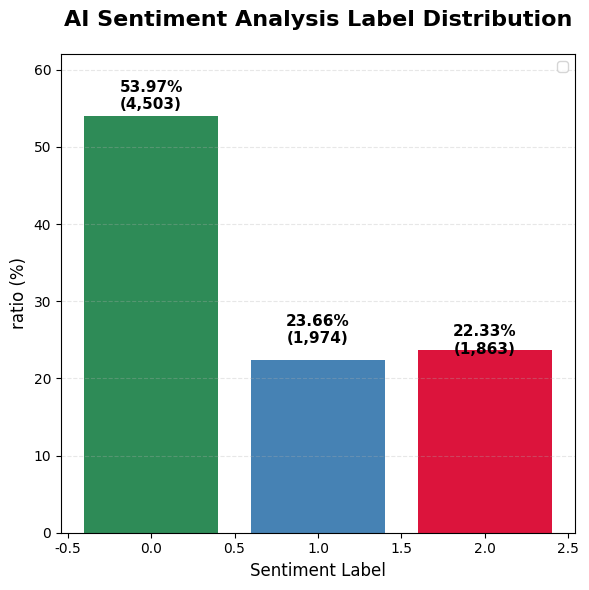

=== AI Sentiment Analysis Label Distribution ===
positive: 4,503건 (53.97%)
neutral: 1,863건 (22.33%)
negative: 1,974건 (23.66%)


In [38]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 막대 그래프 생성
bars = plt.bar(label_ratios.index, label_ratios.values, 
               color=['#2E8B57', '#DC143C', '#4682B4'])  # positive: 초록, negative: 빨강, neutral: 파랑

# 막대 위에 비율 표시
for i, (label, ratio) in enumerate(zip(label_ratios.index, label_ratios.values)):
    plt.text(i, ratio + 0.5, f'{ratio}%\n({label_counts[label]:,})', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

# 격자 추가
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
label_map = {
    0: "positive",
    1: "neutral",
    2: "negative"
}


for label in [0, 1, 2]:
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_map[label]}: {count:,}건 ({ratio}%)")


# 공시 종류별 Sentiment 분포

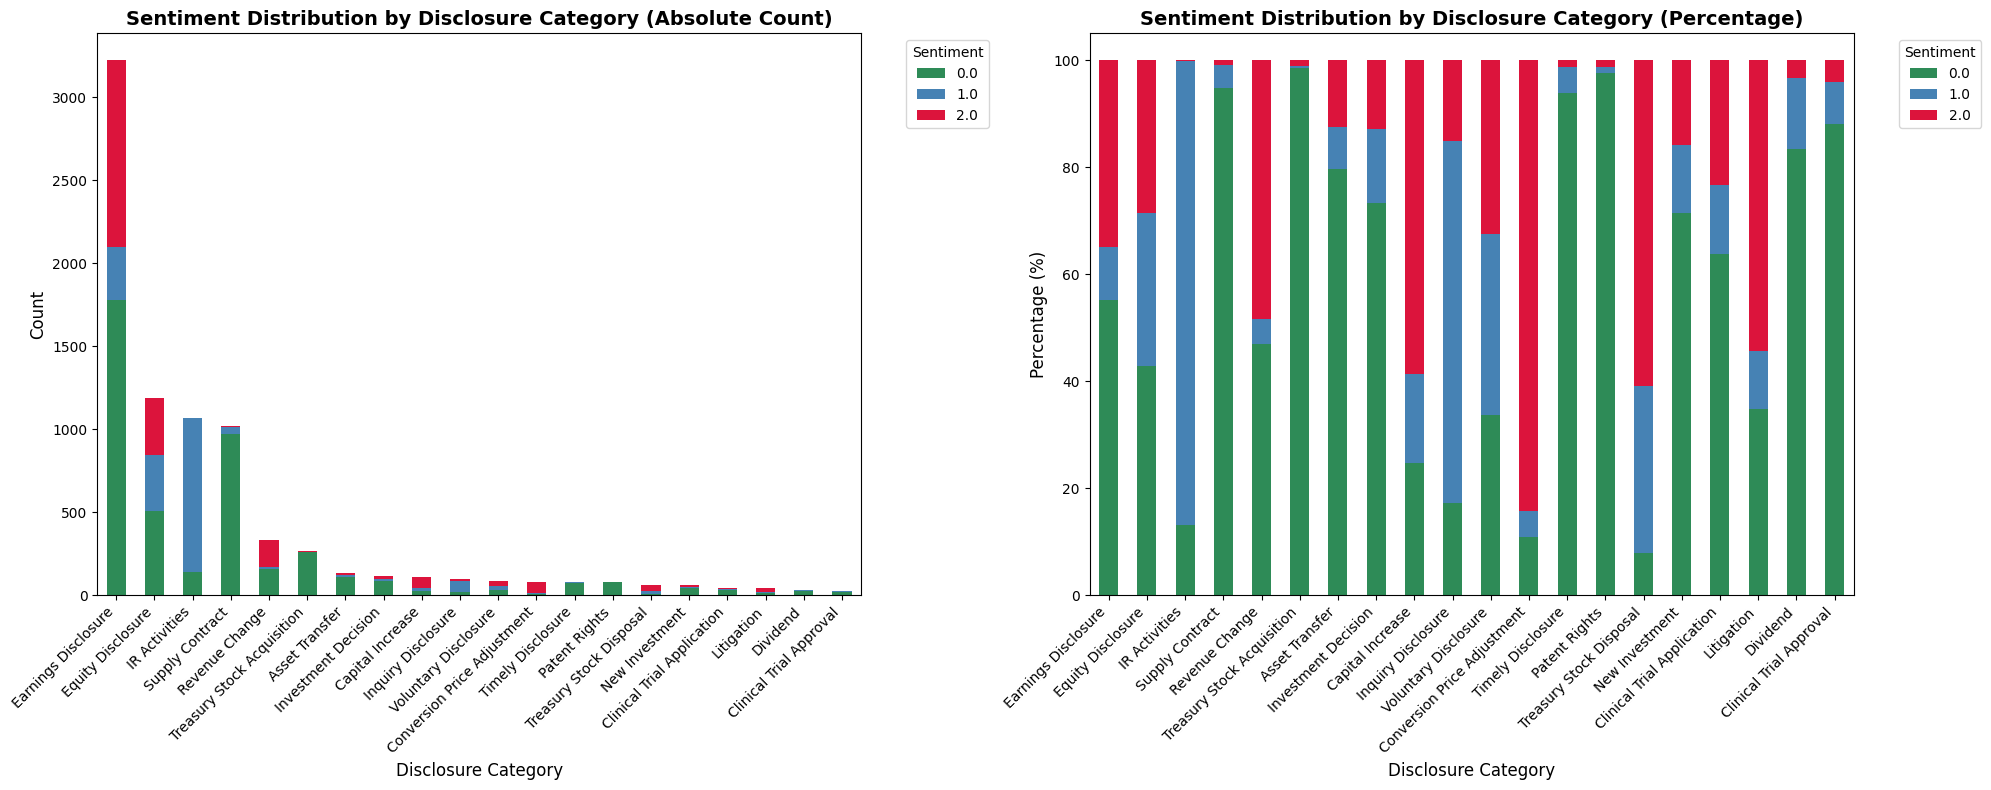

=== 공시 종류별 감정 분포 (상위 20개) ===

[절대 개수]
label                 0.0  1.0   2.0
disclosure_category                 
실적공시                 1778  322  1124
지분공시                  508  340   340
IR활동                  141  925     1
공급계약체결                969   44     9
매출변동                  157   16   162
자사주취득                 262    1     3
자산양수도                 109   11    17
투자판단                   85   16    15
유무상증자                  27   18    64
조회공시                   17   67    15
자율공시                   29   29    28
전환가액조정                  9    4    70
수시공시                   77    4     1
특허권                    79    1     1
자사주처분                   5   20    39
신규투자                   45    8    10
임상시험계획신청               30    6    11
소송                     16    5    25
배당                     25    4     1
임상시험계획승인               22    2     1

[비율 (%)]
label                 0.0   1.0   2.0
disclosure_category                  
실적공시                 55.1  10.0  34.9
지분공시                 42

In [40]:
# 공시 종류별 sentiment 분포 분석
disclosure_sentiment = df_with_returns.groupby(['disclosure_category', 'label']).size().unstack(fill_value=0)

# 비율로 변환
disclosure_sentiment_pct = disclosure_sentiment.div(disclosure_sentiment.sum(axis=1), axis=0) * 100

# 상위 20개 공시 종류만 선택 (데이터가 많은 순서대로)
top_disclosures = df_with_returns['disclosure_category'].value_counts().head(20).index
disclosure_sentiment_pct_top = disclosure_sentiment_pct.loc[top_disclosures]

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. 절대 개수로 표시
disclosure_sentiment_top = disclosure_sentiment.loc[top_disclosures]
disclosure_sentiment_top.plot(kind='bar', stacked=True, ax=ax1, 
                             color=['#2E8B57', '#4682B4', '#DC143C'])  # negative, neutral, positive
ax1.set_title('Sentiment Distribution by Disclosure Category (Absolute Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Disclosure Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# category_mapping을 사용하여 x축 라벨 설정
x_labels = [category_mapping.get(cat, cat) for cat in top_disclosures]
ax1.set_xticklabels(x_labels, rotation=45, ha='right')

# 2. 비율로 표시
disclosure_sentiment_pct_top.plot(kind='bar', stacked=True, ax=ax2,
                                 color=['#2E8B57', '#4682B4', '#DC143C'])  # negative, neutral, positive
ax2.set_title('Sentiment Distribution by Disclosure Category (Percentage)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Disclosure Category', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# category_mapping을 사용하여 x축 라벨 설정
ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 수치 요약 출력
print("=== 공시 종류별 감정 분포 (상위 20개) ===")
print("\n[절대 개수]")
print(disclosure_sentiment_top)
print("\n[비율 (%)]")
print(disclosure_sentiment_pct_top.round(1))

# positive 비율이 높은 공시 종류 TOP 5
print("\n=== Positive 비율이 높은 공시 종류 TOP 5 ===")
positive_ratio = disclosure_sentiment_pct[0].sort_values(ascending=False)
for i, (category, ratio) in enumerate(positive_ratio.head(5).items()):
    total_count = disclosure_sentiment.loc[category].sum()
    mapped_name = category_mapping.get(category, category)
    print(f"{i+1}. {mapped_name}: {ratio:.1f}% (총 {total_count:,}건)")

# negative 비율이 높은 공시 종류 TOP 5
print("\n=== Negative 비율이 높은 공시 종류 TOP 5 ===")
negative_ratio = disclosure_sentiment_pct[2].sort_values(ascending=False)
for i, (category, ratio) in enumerate(negative_ratio.head(5).items()):
    total_count = disclosure_sentiment.loc[category].sum()
    mapped_name = category_mapping.get(category, category)
    print(f"{i+1}. {mapped_name}: {ratio:.1f}% (총 {total_count:,}건)")


In [49]:
# 공시 종류별 감정 라벨과 실제 수익률 간의 상관관계 분석

# 1. 라벨을 숫자로 변환 (negative: -1, neutral: 0, positive: 1)
df_analysis = df_with_returns.copy()
label_mapping = {0: 1, 1: 0, 2: -1}
df_analysis['label_numeric'] = df_analysis['label'].map(label_mapping)
ret_columns = ["abn_ret_10m", "abn_ret_20m", "abn_ret_30m", "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"]

print("=== 공시 종류별 감정 라벨과 실제 수익률 상관관계 분석 ===\n")

# 2. 전체 데이터에 대한 상관관계
print("1. 전체 데이터 상관관계:")
correlations_all = {}
for period in ret_columns:
    # NaN 값 제거
    valid_data = df_analysis.dropna(subset=[period, 'label_numeric'])
    if len(valid_data) > 0:
        corr = valid_data['label_numeric'].corr(valid_data[period])
        correlations_all[period] = corr
        print(f"   {period}: {corr:.4f} (n={len(valid_data):,})")
    else:
        print(f"   {period}: 데이터 없음")

# 3. 주요 공시 종류별 상관관계 분석
print("\n2. 주요 공시 종류별 상관관계 (데이터 100건 이상):")

# 공시 종류별로 충분한 데이터가 있는 것들만 선택
disclosure_counts = df_analysis['disclosure_category'].value_counts()
major_disclosures = disclosure_counts[disclosure_counts >= 10].index

correlation_results = []

for disclosure in major_disclosures:
    disclosure_data = df_analysis[df_analysis['disclosure_category'] == disclosure]
    mapped_name = category_mapping.get(disclosure, disclosure)
    
    print(f"\n   [{mapped_name}] (총 {len(disclosure_data):,}건)")
    
    disclosure_corrs = {}
    for period in ret_columns:
        valid_data = disclosure_data.dropna(subset=[period, 'label_numeric'])
        if len(valid_data) >= 30:  # 최소 30건 이상
            corr = valid_data['label_numeric'].corr(valid_data[period])
            disclosure_corrs[period] = corr
            print(f"     {period}: {corr:.4f} (n={len(valid_data):,})")
        else:
            disclosure_corrs[period] = None
            print(f"     {period}: 데이터 부족 (n={len(valid_data):,})")
    
    correlation_results.append({
        'disclosure': disclosure,
        'mapped_name': mapped_name,
        'total_count': len(disclosure_data),
        **disclosure_corrs
    })

# 4. 상관관계가 높은 공시 종류 TOP 5 (각 기간별)
print("\n3. 상관관계가 높은 공시 종류 TOP 5:")

for period in ret_columns:
    print(f"\n   [{period}]")
    # 해당 기간에 대해 상관관계가 계산된 공시들만 필터링
    valid_corrs = [(r['mapped_name'], r[period], r['total_count']) 
                   for r in correlation_results if r[period] is not None]
    
    if valid_corrs:
        # 상관관계 절댓값으로 정렬
        valid_corrs.sort(key=lambda x: abs(x[1]), reverse=True)
        
        for i, (name, corr, count) in enumerate(valid_corrs[:5]):
            print(f"     {i+1}. {name}: {corr:.4f} (n={count:,})")
    else:
        print("     분석 가능한 데이터 없음")

# 5. 통계적 유의성 검정 (피어슨 상관계수 p-value)
print("\n4. 통계적 유의성 검정 (p < 0.05인 경우만 표시):")

from scipy.stats import pearsonr

for disclosure in major_disclosures[:10]:  # 상위 10개만
    disclosure_data = df_analysis[df_analysis['disclosure_category'] == disclosure]
    mapped_name = category_mapping.get(disclosure, disclosure)
    
    significant_found = False
    for period in ret_columns:
        valid_data = disclosure_data.dropna(subset=[period, 'label_numeric'])
        if len(valid_data) >= 30:
            corr, p_value = pearsonr(valid_data['label_numeric'], valid_data[period])
            if p_value < 0.05:
                if not significant_found:
                    print(f"\n   [{mapped_name}]")
                    significant_found = True
                significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*"
                print(f"     {period}: r={corr:.4f}, p={p_value:.4f} {significance}")
    
    if not significant_found and disclosure == major_disclosures[0]:
        print("   통계적으로 유의한 상관관계를 보이는 공시 종류:")

=== 공시 종류별 감정 라벨과 실제 수익률 상관관계 분석 ===

1. 전체 데이터 상관관계:
   abn_ret_10m: 0.0183 (n=8,340)
   abn_ret_20m: 0.0100 (n=7,890)
   abn_ret_30m: 0.0132 (n=7,438)
   abn_ret_40m: 0.0000 (n=7,038)
   abn_ret_50m: -0.0040 (n=6,630)
   abn_ret_60m: -0.0103 (n=6,257)

2. 주요 공시 종류별 상관관계 (데이터 100건 이상):

   [Earnings Disclosure] (총 3,225건)
     abn_ret_10m: 0.0857 (n=3,224)
     abn_ret_20m: 0.0790 (n=2,970)
     abn_ret_30m: 0.0914 (n=2,794)
     abn_ret_40m: 0.0915 (n=2,619)
     abn_ret_50m: 0.0858 (n=2,435)
     abn_ret_60m: 0.0783 (n=2,279)

   [Equity Disclosure] (총 1,190건)
     abn_ret_10m: 0.0830 (n=1,188)
     abn_ret_20m: 0.0723 (n=1,128)
     abn_ret_30m: 0.0899 (n=1,057)
     abn_ret_40m: 0.0994 (n=1,014)
     abn_ret_50m: 0.1180 (n=963)
     abn_ret_60m: 0.0887 (n=899)

   [IR Activities] (총 1,067건)
     abn_ret_10m: 0.0277 (n=1,067)
     abn_ret_20m: 0.0071 (n=1,029)
     abn_ret_30m: 0.0080 (n=986)
     abn_ret_40m: -0.0044 (n=951)
     abn_ret_50m: -0.0224 (n=918)
     abn_ret_60m: -0.0

     abn_ret_50m: -0.0448 (n=64)
     abn_ret_60m: -0.0936 (n=62)

   [Treasury Stock Disposal] (총 64건)
     abn_ret_10m: -0.0763 (n=64)
     abn_ret_20m: 0.0677 (n=59)
     abn_ret_30m: 0.0336 (n=54)
     abn_ret_40m: 0.3152 (n=49)
     abn_ret_50m: 0.3105 (n=44)
     abn_ret_60m: 0.2519 (n=41)

   [New Investment] (총 63건)
     abn_ret_10m: -0.0124 (n=63)
     abn_ret_20m: 0.1102 (n=60)
     abn_ret_30m: 0.0967 (n=57)
     abn_ret_40m: 0.1433 (n=56)
     abn_ret_50m: 0.2215 (n=50)
     abn_ret_60m: 0.2623 (n=48)

   [Clinical Trial Application] (총 47건)
     abn_ret_10m: 0.1415 (n=47)
     abn_ret_20m: 0.0647 (n=45)
     abn_ret_30m: 0.1046 (n=44)
     abn_ret_40m: 0.0878 (n=43)
     abn_ret_50m: 0.1672 (n=41)
     abn_ret_60m: 0.0588 (n=40)

   [Litigation] (총 46건)
     abn_ret_10m: 0.1720 (n=46)
     abn_ret_20m: 0.3240 (n=44)
     abn_ret_30m: 0.2711 (n=40)
     abn_ret_40m: 0.2175 (n=35)
     abn_ret_50m: 0.1456 (n=33)
     abn_ret_60m: 0.2223 (n=31)

   [Dividend] (총 30건)
     abn

In [50]:
import numpy as np

# 5. 가설 검정: 긍정 라벨 → 양의 수익률, 부정 라벨 → 음의 수익률
print("\n5. 가설 검정: 감정 라벨과 수익률 방향성 일치도 분석")
print("="*60)

# 가설: 긍정 라벨이면 양의 수익률, 부정 라벨이면 음의 수익률을 보일 것이다
for period in ret_columns:
    print(f"\n[{period} 분석]")
    
    # 해당 기간 데이터가 있는 경우만 분석
    valid_data = df_analysis.dropna(subset=[period])
    
    if len(valid_data) == 0:
        print("  분석 가능한 데이터 없음")
        continue
    
    # 긍정/부정 라벨별 수익률 방향성 분석
    positive_data = valid_data[valid_data['label'] == 0][period]
    negative_data = valid_data[valid_data['label'] == 2][period]
    neutral_data = valid_data[valid_data['label'] == 1][period]
    
    print(f"  데이터 수: 긍정 {len(positive_data):,}, 부정 {len(negative_data):,}, 중립 {len(neutral_data):,}")
    
    # 가설 검정 1: 긍정 라벨의 양의 수익률 비율
    if len(positive_data) > 0:
        positive_gains = (positive_data > 0).sum()
        positive_ratio = positive_gains / len(positive_data) * 100
        print(f"  긍정 라벨 → 양의 수익률: {positive_gains:,}/{len(positive_data):,} ({positive_ratio:.1f}%)")
    
    # 가설 검정 2: 부정 라벨의 음의 수익률 비율
    if len(negative_data) > 0:
        negative_losses = (negative_data < 0).sum()
        negative_ratio = negative_losses / len(negative_data) * 100
        print(f"  부정 라벨 → 음의 수익률: {negative_losses:,}/{len(negative_data):,} ({negative_ratio:.1f}%)")
    
    # 평균 수익률 비교
    if len(positive_data) > 0 and len(negative_data) > 0:
        pos_mean = positive_data.mean()
        neg_mean = negative_data.mean()
        neu_mean = neutral_data.mean() if len(neutral_data) > 0 else 0
        
        print(f"  평균 수익률: 긍정 {pos_mean:.3f}%, 부정 {neg_mean:.3f}%, 중립 {neu_mean:.3f}%")
        
        # t-검정으로 통계적 유의성 확인
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(positive_data, negative_data)
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"  t-검정 결과: t={t_stat:.3f}, p={p_value:.4f} {significance}")
        
        # 효과 크기 (Cohen's d)
        pooled_std = np.sqrt(((len(positive_data)-1)*positive_data.var() + (len(negative_data)-1)*negative_data.var()) / 
                           (len(positive_data) + len(negative_data) - 2))
        cohens_d = (pos_mean - neg_mean) / pooled_std if pooled_std > 0 else 0
        print(f"  효과 크기 (Cohen's d): {cohens_d:.3f}")

# 전체 요약 통계
print(f"\n[전체 요약]")
print("-" * 40)

# 모든 기간에 대한 종합 분석
all_periods_summary = []

for period in ret_columns:
    valid_data = df_analysis.dropna(subset=[period])
    if len(valid_data) == 0:
        continue
        
    positive_data = valid_data[valid_data['label'] == 0][period]
    negative_data = valid_data[valid_data['label'] == 2][period]
    
    if len(positive_data) > 0 and len(negative_data) > 0:
        pos_gain_ratio = (positive_data > 0).sum() / len(positive_data) * 100
        neg_loss_ratio = (negative_data < 0).sum() / len(negative_data) * 100
        
        # 가설 일치도 = (긍정→양수 비율 + 부정→음수 비율) / 2
        hypothesis_match = (pos_gain_ratio + neg_loss_ratio) / 2
        
        all_periods_summary.append({
            'period': period,
            'positive_gain_ratio': pos_gain_ratio,
            'negative_loss_ratio': neg_loss_ratio,
            'hypothesis_match': hypothesis_match,
            'pos_mean': positive_data.mean(),
            'neg_mean': negative_data.mean()
        })

if all_periods_summary:
    print("기간별 가설 일치도:")
    for summary in all_periods_summary:
        print(f"  {summary['period']}: {summary['hypothesis_match']:.1f}% "
              f"(긍정→양수 {summary['positive_gain_ratio']:.1f}%, 부정→음수 {summary['negative_loss_ratio']:.1f}%)")
    
    # 전체 평균 가설 일치도
    avg_match = np.mean([s['hypothesis_match'] for s in all_periods_summary])
    print(f"\n전체 평균 가설 일치도: {avg_match:.1f}%")
    
    if avg_match > 50:
        print("→ 가설이 부분적으로 지지됨 (50% 이상)")
    else:
        print("→ 가설이 지지되지 않음 (50% 미만)")



5. 가설 검정: 감정 라벨과 수익률 방향성 일치도 분석

[abn_ret_10m 분석]
  데이터 수: 긍정 4,503, 부정 1,974, 중립 1,863
  긍정 라벨 → 양의 수익률: 2,130/4,503 (47.3%)
  부정 라벨 → 음의 수익률: 1,101/1,974 (55.8%)
  평균 수익률: 긍정 -0.114%, 부정 -0.215%, 중립 -0.013%
  t-검정 결과: t=2.162, p=0.0306 *
  효과 크기 (Cohen's d): 0.058

[abn_ret_20m 분석]
  데이터 수: 긍정 4,294, 부정 1,824, 중립 1,772
  긍정 라벨 → 양의 수익률: 1,986/4,294 (46.3%)
  부정 라벨 → 음의 수익률: 1,065/1,824 (58.4%)
  평균 수익률: 긍정 -0.162%, 부정 -0.249%, 중립 0.004%
  t-검정 결과: t=1.623, p=0.1046 
  효과 크기 (Cohen's d): 0.045

[abn_ret_30m 분석]
  데이터 수: 긍정 4,060, 부정 1,689, 중립 1,689
  긍정 라벨 → 양의 수익률: 1,872/4,060 (46.1%)
  부정 라벨 → 음의 수익률: 979/1,689 (58.0%)
  평균 수익률: 긍정 -0.156%, 부정 -0.269%, 중립 0.019%
  t-검정 결과: t=1.877, p=0.0606 
  효과 크기 (Cohen's d): 0.054

[abn_ret_40m 분석]
  데이터 수: 긍정 3,848, 부정 1,587, 중립 1,603
  긍정 라벨 → 양의 수익률: 1,811/3,848 (47.1%)
  부정 라벨 → 음의 수익률: 918/1,587 (57.8%)
  평균 수익률: 긍정 -0.116%, 부정 -0.162%, 중립 0.069%
  t-검정 결과: t=0.613, p=0.5401 
  효과 크기 (Cohen's d): 0.018

[abn_ret_50m 분석]
  데이터 수: 긍정 3,615, 

In [51]:
import numpy as np
from scipy.stats import ttest_ind

# 5. 가설 검정: 감정 라벨과 수익률 방향성 일치도 분석 (공시 종류별)
print("\n5. 가설 검정: 감정 라벨과 수익률 방향성 일치도 분석 (공시 종류별)")
print("="*80)
ret_columns = ["abn_ret_10m", "abn_ret_20m", "abn_ret_30m", "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"]

# 공시 종류별로 샘플 개수 10개 이상인 것만 분석
disclosure_counts = df_analysis['disclosure_category'].value_counts()
valid_disclosures = disclosure_counts[disclosure_counts >= 10].index.tolist()

print(f"분석 대상 공시 종류 ({len(valid_disclosures)}개): {', '.join(valid_disclosures[:5])}{'...' if len(valid_disclosures) > 5 else ''}")
print(f"(샘플 수 10개 이상인 공시 종류만 분석)")

for disclosure in valid_disclosures:
    print(f"\n{'='*60}")
    print(f"공시 종류: {disclosure}")
    print(f"{'='*60}")
    
    # 해당 공시 종류 데이터 필터링
    disclosure_data = df_analysis[df_analysis['disclosure_category'] == disclosure]
    
    # 가설: 긍정 라벨이면 양의 수익률, 부정 라벨이면 음의 수익률을 보일 것이다
    for period in ret_columns:
        print(f"\n[{period} 분석]")
        
        # 해당 기간 데이터가 있는 경우만 분석
        valid_data = disclosure_data.dropna(subset=[period])
        
        if len(valid_data) == 0:
            print("  분석 가능한 데이터 없음")
            continue
        
        # 긍정/부정 라벨별 수익률 방향성 분석
        positive_data = valid_data[valid_data['label'] == 0][period]
        negative_data = valid_data[valid_data['label'] == 2][period]
        neutral_data = valid_data[valid_data['label'] == 1][period]
        
        print(f"  데이터 수: 긍정 {len(positive_data):,}, 부정 {len(negative_data):,}, 중립 {len(neutral_data):,}")
        
        # 가설 검정 1: 긍정 라벨의 양의 수익률 비율
        if len(positive_data) > 0:
            positive_gains = (positive_data > 0).sum()
            positive_ratio = positive_gains / len(positive_data) * 100
            print(f"  긍정 라벨 → 양의 수익률: {positive_gains:,}/{len(positive_data):,} ({positive_ratio:.1f}%)")
        
        # 가설 검정 2: 부정 라벨의 음의 수익률 비율
        if len(negative_data) > 0:
            negative_losses = (negative_data < 0).sum()
            negative_ratio = negative_losses / len(negative_data) * 100
            print(f"  부정 라벨 → 음의 수익률: {negative_losses:,}/{len(negative_data):,} ({negative_ratio:.1f}%)")
        
        # 평균 수익률 비교
        if len(positive_data) > 0 and len(negative_data) > 0:
            pos_mean = positive_data.mean()
            neg_mean = negative_data.mean()
            neu_mean = neutral_data.mean() if len(neutral_data) > 0 else 0
            
            print(f"  평균 수익률: 긍정 {pos_mean:.3f}%, 부정 {neg_mean:.3f}%, 중립 {neu_mean:.3f}%")
            
            # t-검정으로 통계적 유의성 확인 (샘플 수가 충분한 경우만)
            if len(positive_data) >= 5 and len(negative_data) >= 5:
                t_stat, p_value = ttest_ind(positive_data, negative_data)
                significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
                print(f"  t-검정 결과: t={t_stat:.3f}, p={p_value:.4f} {significance}")
                
                # 효과 크기 (Cohen's d)
                pooled_std = np.sqrt(((len(positive_data)-1)*positive_data.var() + (len(negative_data)-1)*negative_data.var()) / 
                                   (len(positive_data) + len(negative_data) - 2))
                cohens_d = (pos_mean - neg_mean) / pooled_std if pooled_std > 0 else 0
                print(f"  효과 크기 (Cohen's d): {cohens_d:.3f}")

# 공시 종류별 전체 요약 통계
print(f"\n{'='*80}")
print(f"[공시 종류별 전체 요약]")
print(f"{'='*80}")

# 각 공시 종류별로 모든 기간에 대한 종합 분석
disclosure_summary = {}

for disclosure in valid_disclosures:
    disclosure_data = df_analysis[df_analysis['disclosure_category'] == disclosure]
    periods_summary = []
    
    for period in ret_columns:
        valid_data = disclosure_data.dropna(subset=[period])
        if len(valid_data) == 0:
            continue
            
        positive_data = valid_data[valid_data['label'] == 0][period]
        negative_data = valid_data[valid_data['label'] == 2][period]
        
        if len(positive_data) > 0 and len(negative_data) > 0:
            pos_gain_ratio = (positive_data > 0).sum() / len(positive_data) * 100
            neg_loss_ratio = (negative_data < 0).sum() / len(negative_data) * 100
            
            # 가설 일치도 = (긍정→양수 비율 + 부정→음수 비율) / 2
            hypothesis_match = (pos_gain_ratio + neg_loss_ratio) / 2
            
            periods_summary.append({
                'period': period,
                'positive_gain_ratio': pos_gain_ratio,
                'negative_loss_ratio': neg_loss_ratio,
                'hypothesis_match': hypothesis_match,
                'pos_mean': positive_data.mean(),
                'neg_mean': negative_data.mean()
            })
    
    if periods_summary:
        avg_match = np.mean([s['hypothesis_match'] for s in periods_summary])
        disclosure_summary[disclosure] = {
            'periods': periods_summary,
            'avg_match': avg_match
        }

# 공시 종류별 가설 일치도 순위
if disclosure_summary:
    print("\n공시 종류별 평균 가설 일치도 순위:")
    sorted_disclosures = sorted(disclosure_summary.items(), key=lambda x: x[1]['avg_match'], reverse=True)
    
    for i, (disclosure, summary) in enumerate(sorted_disclosures[:10], 1):  # 상위 10개만 표시
        print(f"{i:2d}. {disclosure}: {summary['avg_match']:.1f}%")
    
    print(f"\n상위 3개 공시 종류 상세 분석:")
    for disclosure, summary in sorted_disclosures[:3]:
        print(f"\n[{disclosure}] - 평균 가설 일치도: {summary['avg_match']:.1f}%")
        for period_summary in summary['periods']:
            print(f"  {period_summary['period']}: {period_summary['hypothesis_match']:.1f}% "
                  f"(긍정→양수 {period_summary['positive_gain_ratio']:.1f}%, 부정→음수 {period_summary['negative_loss_ratio']:.1f}%)")
        
        if summary['avg_match'] > 50:
            print(f"  → 가설이 부분적으로 지지됨 (50% 이상)")
        else:
            print(f"  → 가설이 지지되지 않음 (50% 미만)")



5. 가설 검정: 감정 라벨과 수익률 방향성 일치도 분석 (공시 종류별)
분석 대상 공시 종류 (26개): 실적공시, 지분공시, IR활동, 공급계약체결, 매출변동...
(샘플 수 10개 이상인 공시 종류만 분석)

공시 종류: 실적공시

[abn_ret_10m 분석]
  데이터 수: 긍정 1,778, 부정 1,124, 중립 322
  긍정 라벨 → 양의 수익률: 916/1,778 (51.5%)
  부정 라벨 → 음의 수익률: 645/1,124 (57.4%)
  평균 수익률: 긍정 0.025%, 부정 -0.240%, 중립 -0.203%
  t-검정 결과: t=4.785, p=0.0000 ***
  효과 크기 (Cohen's d): 0.182

[abn_ret_20m 분석]
  데이터 수: 긍정 1,655, 부정 1,015, 중립 300
  긍정 라벨 → 양의 수익률: 831/1,655 (50.2%)
  부정 라벨 → 음의 수익률: 615/1,015 (60.6%)
  평균 수익률: 긍정 0.000%, 부정 -0.282%, 중립 -0.221%
  t-검정 결과: t=4.256, p=0.0000 ***
  효과 크기 (Cohen's d): 0.170

[abn_ret_30m 분석]
  데이터 수: 긍정 1,575, 부정 939, 중립 280
  긍정 라벨 → 양의 수익률: 792/1,575 (50.3%)
  부정 라벨 → 음의 수익률: 569/939 (60.6%)
  평균 수익률: 긍정 0.011%, 부정 -0.340%, 중립 -0.315%
  t-검정 결과: t=4.749, p=0.0000 ***
  효과 크기 (Cohen's d): 0.196

[abn_ret_40m 분석]
  데이터 수: 긍정 1,482, 부정 879, 중립 258
  긍정 라벨 → 양의 수익률: 744/1,482 (50.2%)
  부정 라벨 → 음의 수익률: 530/879 (60.3%)
  평균 수익률: 긍정 -0.008%, 부정 -0.378%, 중립 -0.359%
  t-검정 결과: t=4

  데이터 수: 긍정 9, 부정 70, 중립 4
  긍정 라벨 → 양의 수익률: 3/9 (33.3%)
  부정 라벨 → 음의 수익률: 29/70 (41.4%)
  평균 수익률: 긍정 0.060%, 부정 0.094%, 중립 0.145%
  t-검정 결과: t=-0.222, p=0.8247 
  효과 크기 (Cohen's d): -0.079

[abn_ret_20m 분석]
  데이터 수: 긍정 9, 부정 66, 중립 3
  긍정 라벨 → 양의 수익률: 5/9 (55.6%)
  부정 라벨 → 음의 수익률: 29/66 (43.9%)
  평균 수익률: 긍정 0.070%, 부정 0.092%, 중립 -0.013%
  t-검정 결과: t=-0.118, p=0.9067 
  효과 크기 (Cohen's d): -0.042

[abn_ret_30m 분석]
  데이터 수: 긍정 8, 부정 61, 중립 3
  긍정 라벨 → 양의 수익률: 4/8 (50.0%)
  부정 라벨 → 음의 수익률: 28/61 (45.9%)
  평균 수익률: 긍정 -0.150%, 부정 0.123%, 중립 0.200%
  t-검정 결과: t=-1.137, p=0.2597 
  효과 크기 (Cohen's d): -0.427

[abn_ret_40m 분석]
  데이터 수: 긍정 8, 부정 55, 중립 3
  긍정 라벨 → 양의 수익률: 4/8 (50.0%)
  부정 라벨 → 음의 수익률: 25/55 (45.5%)
  평균 수익률: 긍정 -0.124%, 부정 0.143%, 중립 0.547%
  t-검정 결과: t=-0.888, p=0.3782 
  효과 크기 (Cohen's d): -0.336

[abn_ret_50m 분석]
  데이터 수: 긍정 7, 부정 51, 중립 3
  긍정 라벨 → 양의 수익률: 4/7 (57.1%)
  부정 라벨 → 음의 수익률: 24/51 (47.1%)
  평균 수익률: 긍정 -0.017%, 부정 0.110%, 중립 0.560%
  t-검정 결과: t=-0.335, p=0.7388 
  